# Procesamiento de Imágenes - Trabajo Práctico N°2
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

## Ejercicio 2 - *ex2.m*
En esta notebook se realiza el análisis del código *ex2.m* suministrado por la cátedra, previa traducción del mismo a Python.

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import scipy.signal as ss

In [7]:
# Equivalent to fspecial('unsharp')
def unsharp(alpha = 0.2, case='diag'):
    if case == 'diag':
        kernel = np.array([[0,0,0],[0,1,0],[0,0,0]]) - np.array([[1,1,1],[1, -8, 1],[1,1,1]])
    elif case == 'ninety':
        kernel = np.array([[0,0,0],[0,1,0],[0,0,0]]) - np.array([[0,1,0],[1, -4, 1],[0,1,0]])
    else:
        h1 = alpha/(1+alpha)
        h2 = (1-alpha)/(1+alpha)
        kernel = np.array([[0,0,0],[0,1,0],[0,0,0]]) - np.array([[h1, h2, h1],[h2, -4/(1+alpha), h2],[h1, h2, h1]])
    return kernel

In [19]:
original_image = np.array(Image.open('../../../assets/barbara.gif'))

In [20]:
identity = np.array([[0,0,0],[0,1,0],[0,0,0]])
h1 = unsharp(case='diag')
h2 = unsharp(case='ninety')
h3 = unsharp(case='matlab')

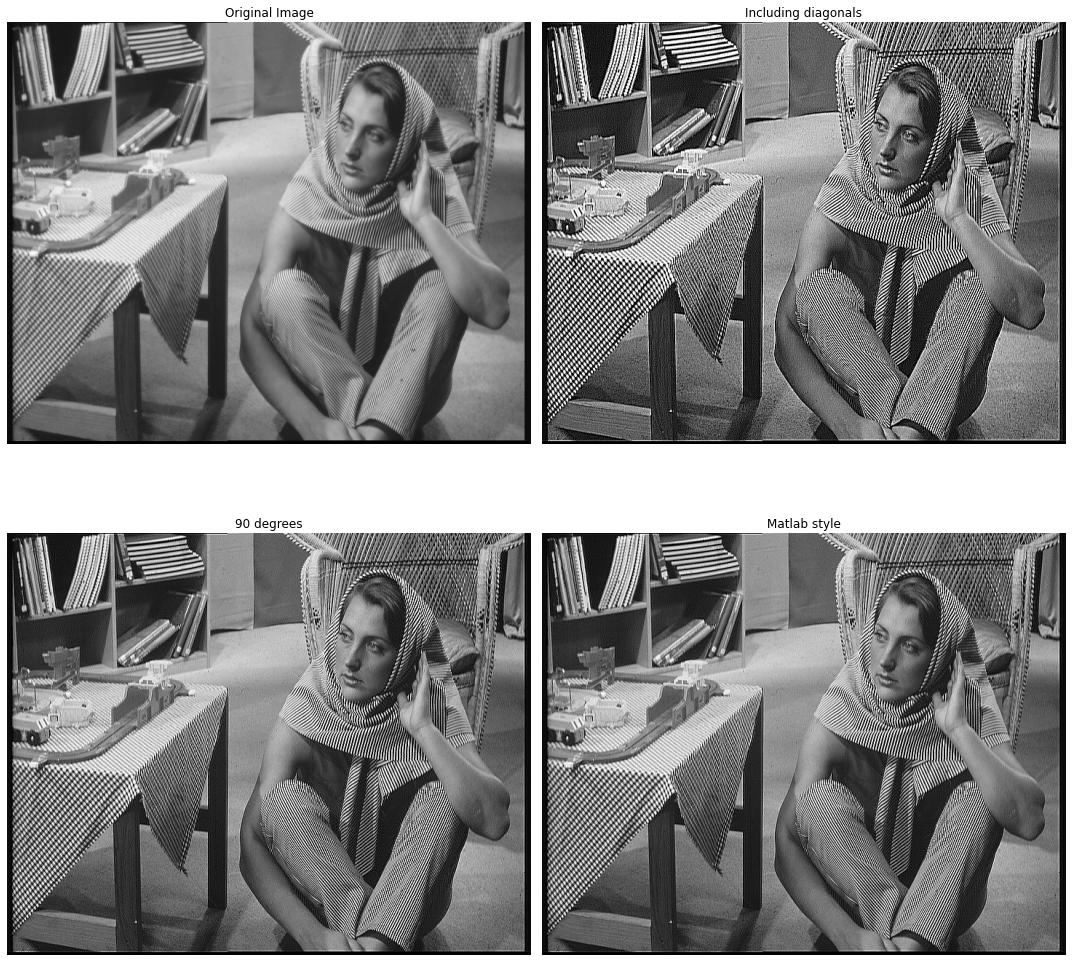

In [21]:
fig, ax = plt.subplots(2,2,figsize=(15, 15))
kernels = [identity, h1, h2, h3]
titles = ['Original Image', 'Including diagonals', '90 degrees', 'Matlab style']
for i in range(4):
    ax[i//2][i%2].axis('off')
    ax[i//2][i%2].set_title(titles[i])
    ax[i//2][i%2].imshow(np.uint8(cv2.filter2D(original_image,-1, kernels[i])), cmap='gray')
    #ax[i//2][i%2].tightlayout()
fig.tight_layout()
fig.savefig('images.png')

En el codigo se aplica un filtro de tipo $\textit{unsharp}$ a una imagen, el cual se puede entender como un filtro laplaciano agregando el fondo, lo cual obtiene como resultado una imagen con los bordes o zonas con cambios en la intensidad mas resaltados, dependiendo de las direcciones que se utilicen para el calculo del laplaciano.

En el ejemplo podemos observar como incluyendo las diagonales en el laplaciano, se obtiene mayor definición en cambios de intensidad que tengan dirección oblicua, como puede observarse en el mantel. En contraste si solo se utilizan los vecinos que se encuentran a 90° del pixel central, es posible observar que se realzan en mayor medida los contrastes que se encuentran en sentido horizontal o vertical, como pueden ser los libros o el tramado del pañuelo. 

Por utlimo tambíen se muestra como quedaria la imagen si se utiliza un factor $\alpha$ para regular la forma del lapalciano en cuanto al nivel de ponderación entre los vecinos diagolanes y los vencinos a 90°.